In [1]:
# 第一个cell - 添加项目路径
import sys
import os
sys.path.append('..')  # 添加项目根目录到Python路径

# 导入库
import torch
import matplotlib.pyplot as plt
import numpy as np
from src.data.loader import load_mnist_data
from src.data.preprocessing import visualize_samples, print_data_summary

In [2]:
# 第二个cell - 加载和探索数据
train_loader, test_loader = load_mnist_data(batch_size=64)
# 打印数据摘要
print_data_summary(train_loader, test_loader)

=== Data Summary ===
Training set size: 60000
Test set size: 10000
Total samples: 70000

=== Class Distribution ===
Class	Train	Test	Total
------------------------------
0	5923	980	6903
1	6742	1135	7877
2	5958	1032	6990
3	6131	1010	7141
4	5842	982	6824
5	5421	892	6313
6	5918	958	6876
7	6265	1028	7293
8	5851	974	6825
9	5949	1009	6958


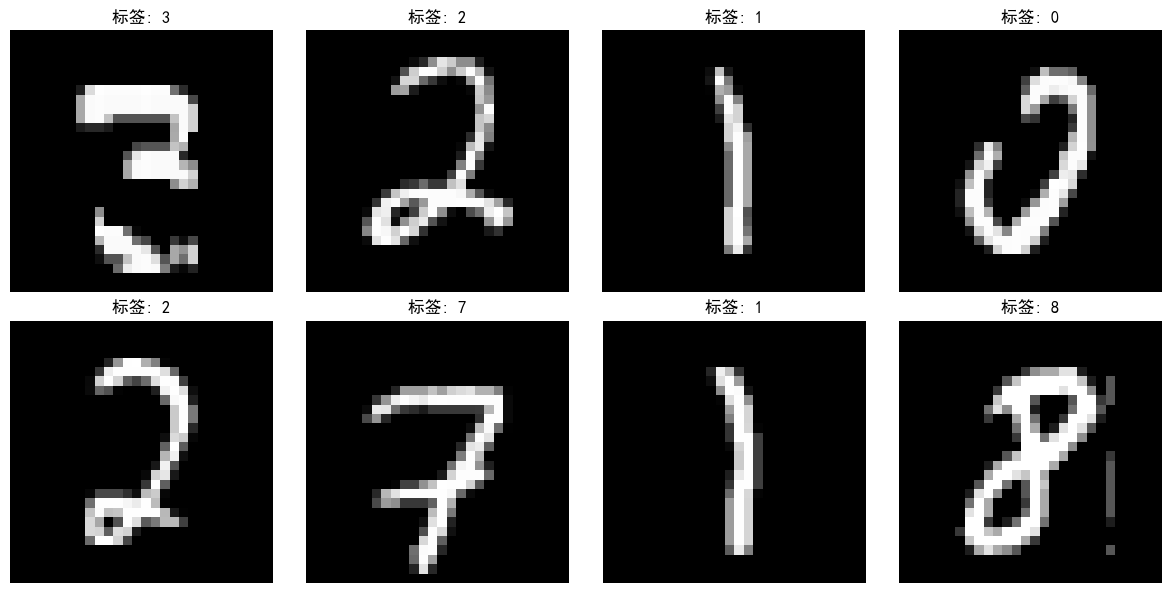

In [3]:
# 第三个cell - 可视化样本
visualize_samples(train_loader, num_samples=8)

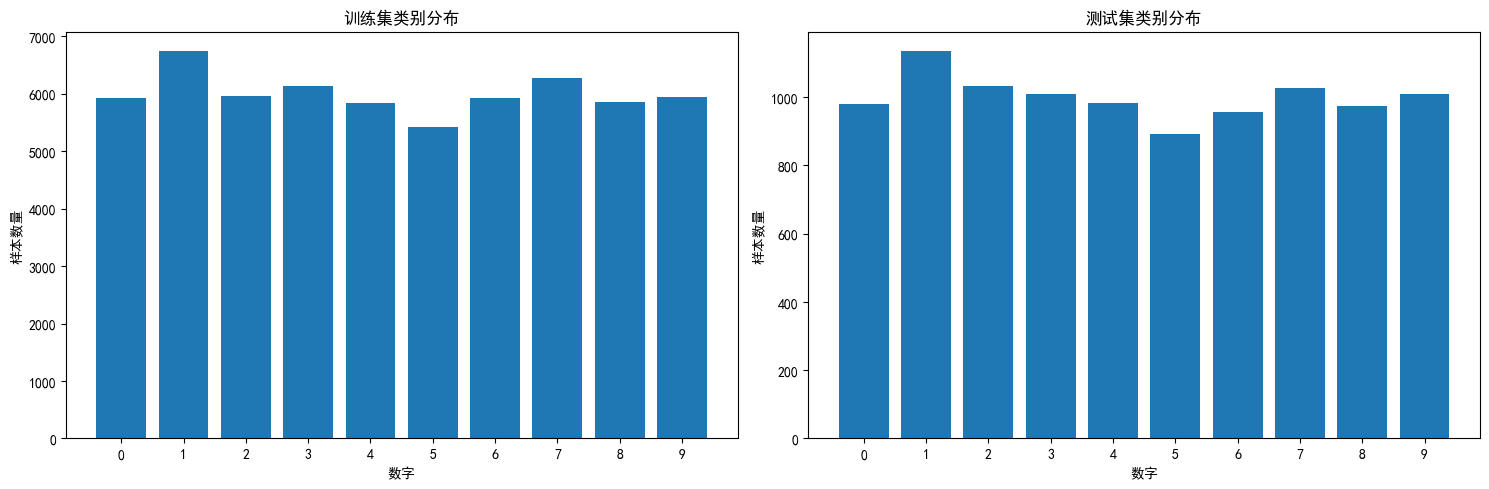

In [4]:
# 第四个cell - 数据分布分析
import seaborn as sns

# 获取类别分布
def get_class_distribution(data_loader):
    class_counts = torch.zeros(10)
    for _, labels in data_loader:
        for label in labels:
            class_counts[label] += 1
    return class_counts

train_class_counts = get_class_distribution(train_loader)
test_class_counts = get_class_distribution(test_loader)

# 绘制类别分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 训练集分布
ax1.bar(range(10), train_class_counts.numpy())
ax1.set_title('训练集类别分布')
ax1.set_xlabel('数字')
ax1.set_ylabel('样本数量')
ax1.set_xticks(range(10))

# 测试集分布
ax2.bar(range(10), test_class_counts.numpy())
ax2.set_title('测试集类别分布')
ax2.set_xlabel('数字')
ax2.set_ylabel('样本数量')
ax2.set_xticks(range(10))

plt.tight_layout()
plt.show()